In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
txData = pd.read_csv('TCxResults05.csv')

In [3]:
len(txData)

50281

In [4]:
txData.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,LOC105377988,407.337405,5.365150,0.842596,6.367404,1.922545e-10,0.000010
1,RPL39P13,646.069382,5.239792,0.848607,6.174581,6.633914e-10,0.000017
2,AKAP9,1784.186701,5.420859,0.948780,5.713502,1.106743e-08,0.000185
3,LOC100128027,522.010377,4.970087,0.878678,5.656322,1.546516e-08,0.000194
4,LINC00692,1363.033918,5.630601,1.022791,5.505132,3.688914e-08,0.000371


In [5]:
significantPs = []
for i in txData.padj:
    if i < 0.05:
        significantPs.append(i)

print(len(significantPs))

548


In [6]:
significanttxData = txData[:549]

In [7]:
significanttxData = significanttxData.sort_values('log2FoldChange', ascending = True)
significanttxData.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
105,NMTRQ-TTG10-1,544.052257,-4.070476,0.954318,-4.265326,0.000020,0.009300
74,PIBF1,1213.183276,-3.970826,0.900150,-4.411295,0.000010,0.006889
120,LOC100133137,1209.647689,-3.910323,0.926131,-4.222214,0.000024,0.010159
132,LOC441907,1167.068924,-3.859123,0.923810,-4.177399,0.000029,0.011147
65,LOC105377217,753.380647,-3.582829,0.806508,-4.442398,0.000009,0.006777


In [8]:
significanttxData = significanttxData[~significanttxData['Unnamed: 0'].str.contains("LOC")]

In [17]:
upRegTx = significanttxData[significanttxData.log2FoldChange >= 2]
downRegTx = significanttxData[significanttxData.log2FoldChange <= 2]
enrichedTx = upRegTx.append(downRegTx)
enrichedTx = enrichedTx.sort_values('log2FoldChange')
enrichedTx.to_csv('Enriched Temporal Cortex Genes in Dementia.csv')

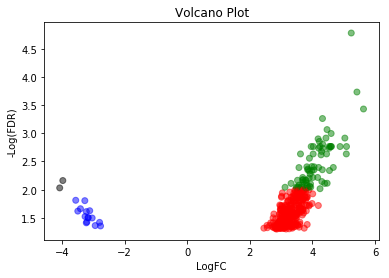

In [10]:
def volcano(df):

    

    fdr = df['padj']

    logfc = df['log2FoldChange']



    # If logfc > 1 and fdr < 1.9999 (meaning p=0.01) -> red ("up" very sure)

    # elsif fdr < 1.999 (meaning p=0.01) -> blue ('down' very sure)

    # elsif logfc > 1 ( meaning with high FDR) green

    # else logfc < 1 fdr > 1.9999 black

    # np.where(condition, then, else) it can be nested np.where(condition, then, np.where(condition, then, else))

    col = np.where((logfc > 1) & (fdr < 1.99999),'r', np.where(fdr < 1.99999,'b', np.where(logfc > 1,'g','k')))



    plt.scatter(logfc, fdr,  c=col, alpha=0.5)

    plt.title('Volcano Plot')

    plt.xlabel('LogFC')

    plt.ylabel('-Log(FDR)')

    plt.show()

    

    



df_volcano_t1 = enrichedTx.loc[:, ['padj','log2FoldChange']]

df_volcano_t1['padj'] = df_volcano_t1['padj'].apply(np.log10).apply(lambda x: x * (-1))



volcano(df_volcano_t1)

In [11]:
enrichedTx.head(10)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
105,NMTRQ-TTG10-1,544.052257,-4.070476,0.954318,-4.265326,0.000020,0.009300
74,PIBF1,1213.183276,-3.970826,0.900150,-4.411295,0.000010,0.006889
179,HORMAD2,877.271442,-3.558738,0.882598,-4.032119,0.000055,0.015423
270,PPP1CB,813.629632,-3.492058,0.912534,-3.826770,0.000130,0.024002
242,ATP5J2,778.975629,-3.407720,0.878486,-3.879081,0.000105,0.021757
183,HPCAL1,1496.349308,-3.268306,0.812278,-4.023631,0.000057,0.015660
323,RPL17P2,1099.162852,-3.260464,0.874551,-3.728156,0.000193,0.029898
413,PCDHGA9,638.773502,-3.220713,0.894865,-3.599103,0.000319,0.038717
278,HACD1,1575.501078,-3.219505,0.843796,-3.815501,0.000136,0.024493
393,CERS3,515.399421,-3.202985,0.884686,-3.620475,0.000294,0.037432


In [12]:
enrichedTx.tail(10)

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
7,CNGB3,461.285312,4.597195,0.877298,5.240175,1.604244e-07,0.001008
19,LINC00551,483.167258,4.607427,0.927699,4.966511,6.816835e-07,0.001717
43,ZNF736P1Y,662.243863,4.666313,1.006300,4.637100,3.533317e-06,0.004038
21,EEF1A1P31,760.845740,4.882287,0.980802,4.977853,6.429351e-07,0.001717
8,RPL31P22,601.969591,5.035006,0.975043,5.163883,2.418791e-07,0.001216
34,NLGN4Y,354.458088,5.081766,1.059562,4.796102,1.617832e-06,0.002324
14,LINC01118,372.796208,5.087539,1.028047,4.948743,7.469421e-07,0.001717
1,RPL39P13,646.069382,5.239792,0.848607,6.174581,6.633914e-10,0.000017
2,AKAP9,1784.186701,5.420859,0.948780,5.713502,1.106743e-08,0.000185
4,LINC00692,1363.033918,5.630601,1.022791,5.505132,3.688914e-08,0.000371


In [13]:
upRegGenesTx = list()
upRegGenesTx.append(upRegTx['Unnamed: 0'])
upRegGenesTx

[535           PIGQ
 481        TREML3P
 526        CDH12P3
 483           EPN2
 411      RNA5SP138
 521      RNA5SP202
 406        TIMM23B
 350         SLC5A1
 518        DYNC1H1
 309        ANKRD63
 471      RPL21P115
 509           LCP2
 539           MYRF
 510       MIR99AHG
 362        PRPF40A
 532       RNU5F-8P
 548           KSR2
 474       HNRNPCP9
 467        FAM118B
 542       RPL39P33
 427        RPL7P46
 475        CYP11B1
 410           CCR3
 490         LRRC4C
 522          PDE6A
 396          HMGB4
 525    CCDC148-AS1
 486           DAZ4
 437         S100A7
 424        GPATCH3
           ...     
 11           FARS2
 18       NDUFA12P1
 109          YIPF6
 35           VN1R3
 29          ELAVL3
 76          C6orf1
 47          NEFLP1
 5          MIR7112
 12          CCDC68
 25      KCNIP4-IT1
 84         ATP5HP1
 9         TNFRSF19
 31          CFL1P7
 6            COX8C
 80         MIR4800
 17          RAC1P8
 27          MRS2P2
 54             WAC
 15       LINC00588


In [14]:
downRegGenesTx = list()
downRegGenesTx.append(downRegTx['Unnamed: 0'])
downRegGenesTx

[105    NMTRQ-TTG10-1
 74             PIBF1
 179          HORMAD2
 270           PPP1CB
 242           ATP5J2
 183           HPCAL1
 323          RPL17P2
 413          PCDHGA9
 278            HACD1
 393            CERS3
 338            SDAD1
 347           ZDHHC1
 267           YEATS4
 353        MIR4472-1
 488          ZDHHC15
 398        TNFAIP8L1
 491         NDUFB1P2
 Name: Unnamed: 0, dtype: object]